In [9]:
import matplotlib.pyplot as plt; plt.rcParams["figure.figsize"] = (30,15)
import pandas as pd
import pickle
from tsclustering import *
from tsclustering import KMeans
from sklearn.metrics import rand_score, adjusted_rand_score
import numpy as np

In [10]:
# Loading Sample Time Series Data 
with open('./data/sample_data/X.pickle','rb') as file:
    X = pickle.load(file)
with open('./data/sample_data/y.pickle','rb') as file:
    y = pickle.load(file)

In [26]:
from tsshapelet import Shapelet

shape = Shapelet(list(X[3])+list(X[4]))

shape.smooth(3)

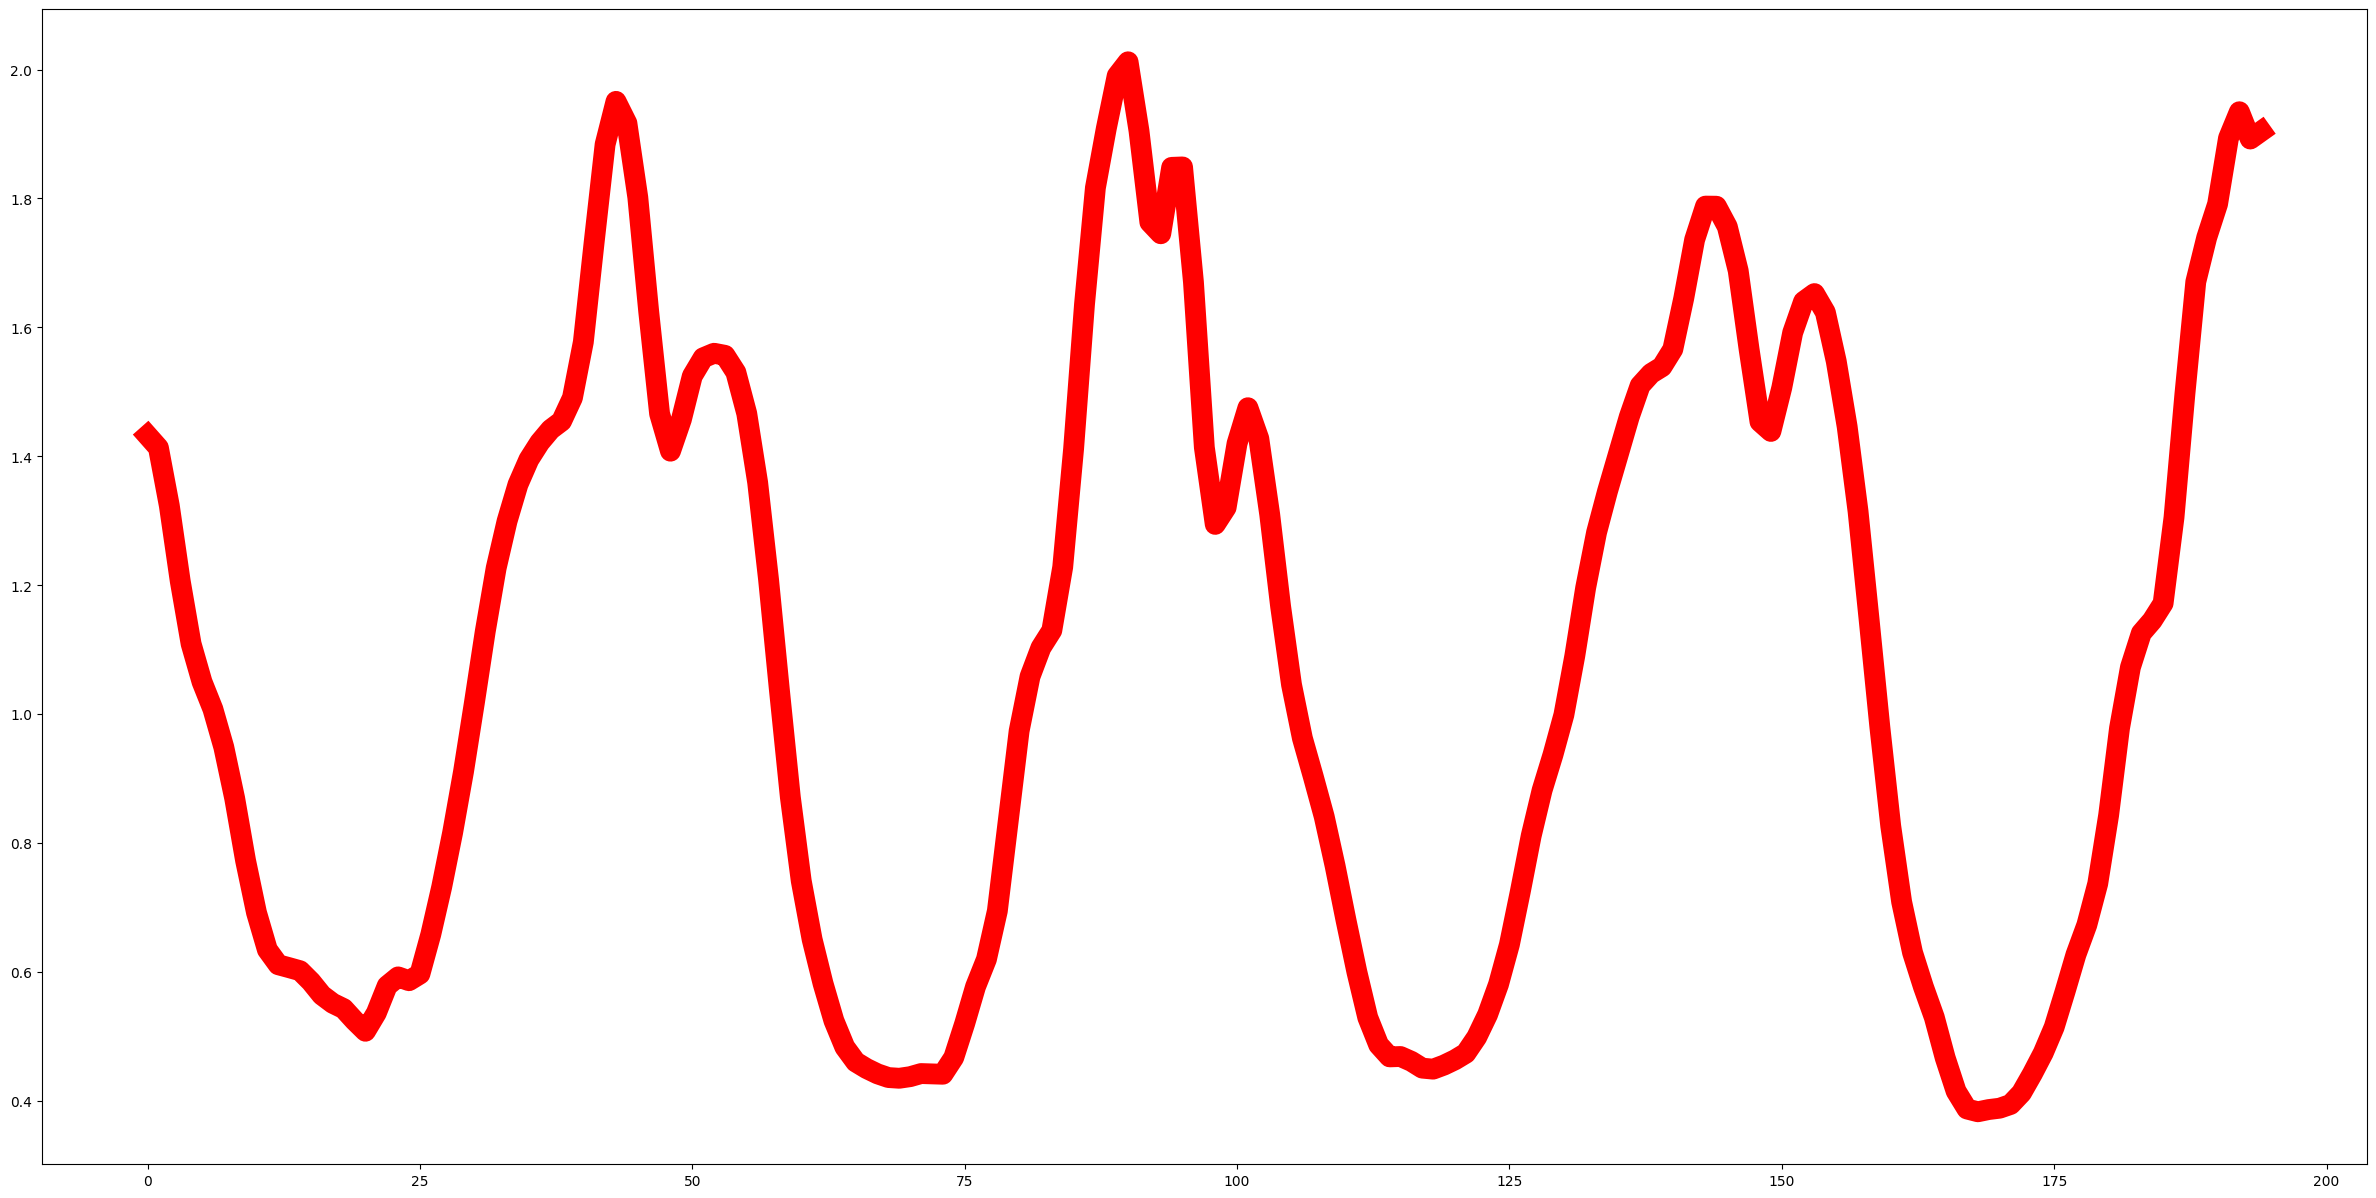

In [30]:
plt.plot(shape.series[6:], lw = 15, color = 'red')

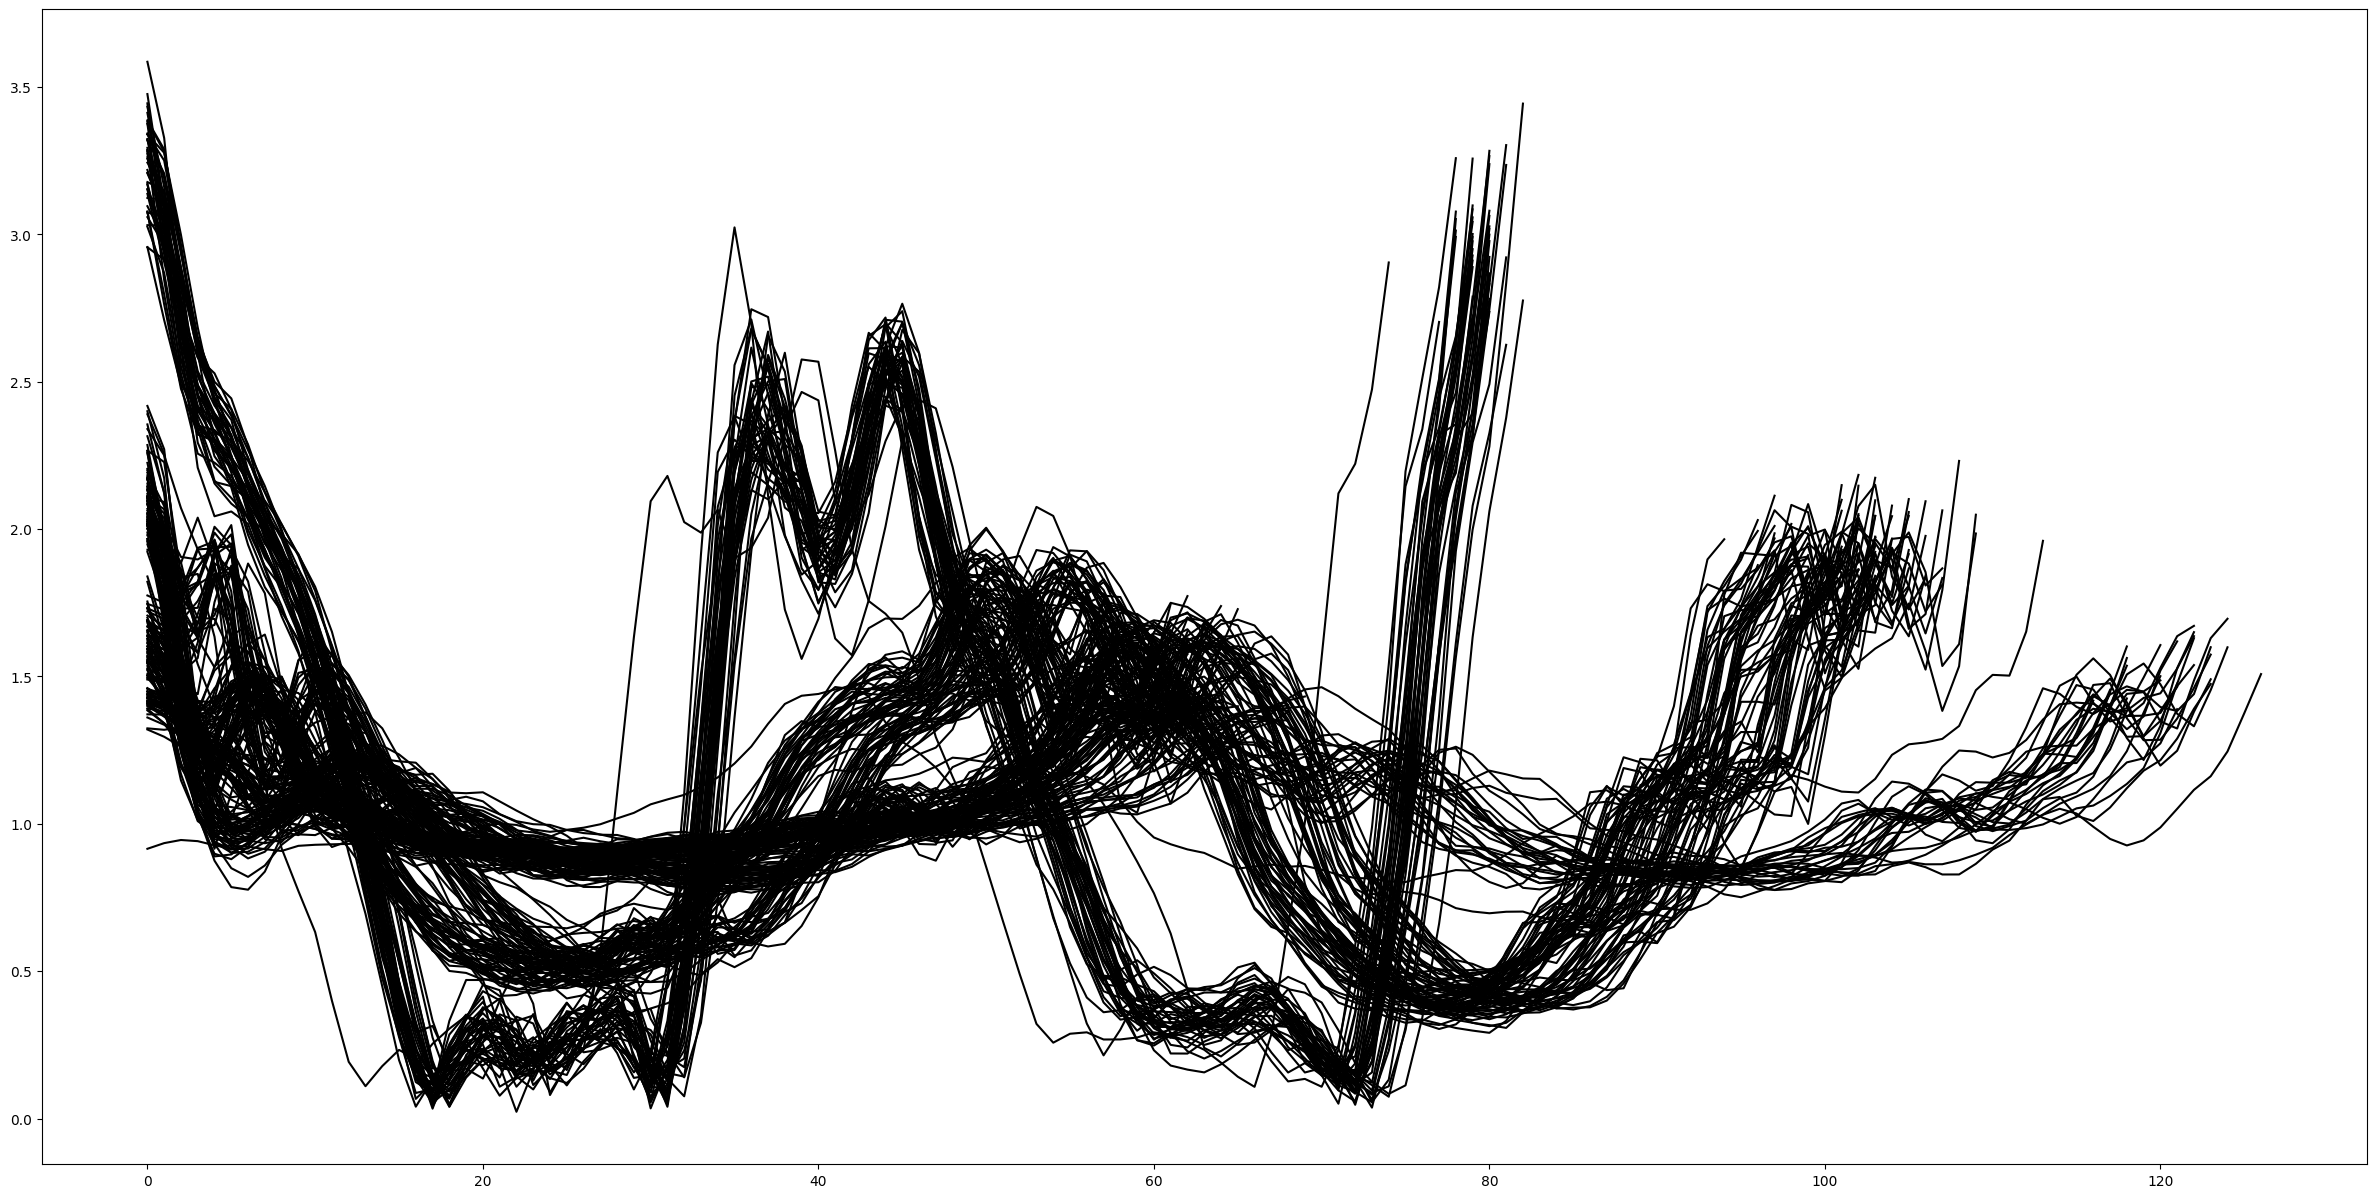

In [11]:
# Plotting sample data

for x in X:
    plt.plot(x, color = 'black');

In [12]:
# Clustering with KMeans

km = KMeans(k_clusters = 3, n_init = 10, max_iter = 100, centroids = [], metric = 'dtw', averaging = 'interpolated')
km.fit(X)

In [13]:
# Calculate the inertia

km._get_inertia()

103.1764082788374

In [14]:
# Using sklearn to evaluate clustering using ground-truth clusters

print('Rand Index:', round(rand_score(km.clusters, y),2))
print('Adjusted RI:', round(adjusted_rand_score(km.clusters, y),2))

Rand Index: 1.0
Adjusted RI: 1.0


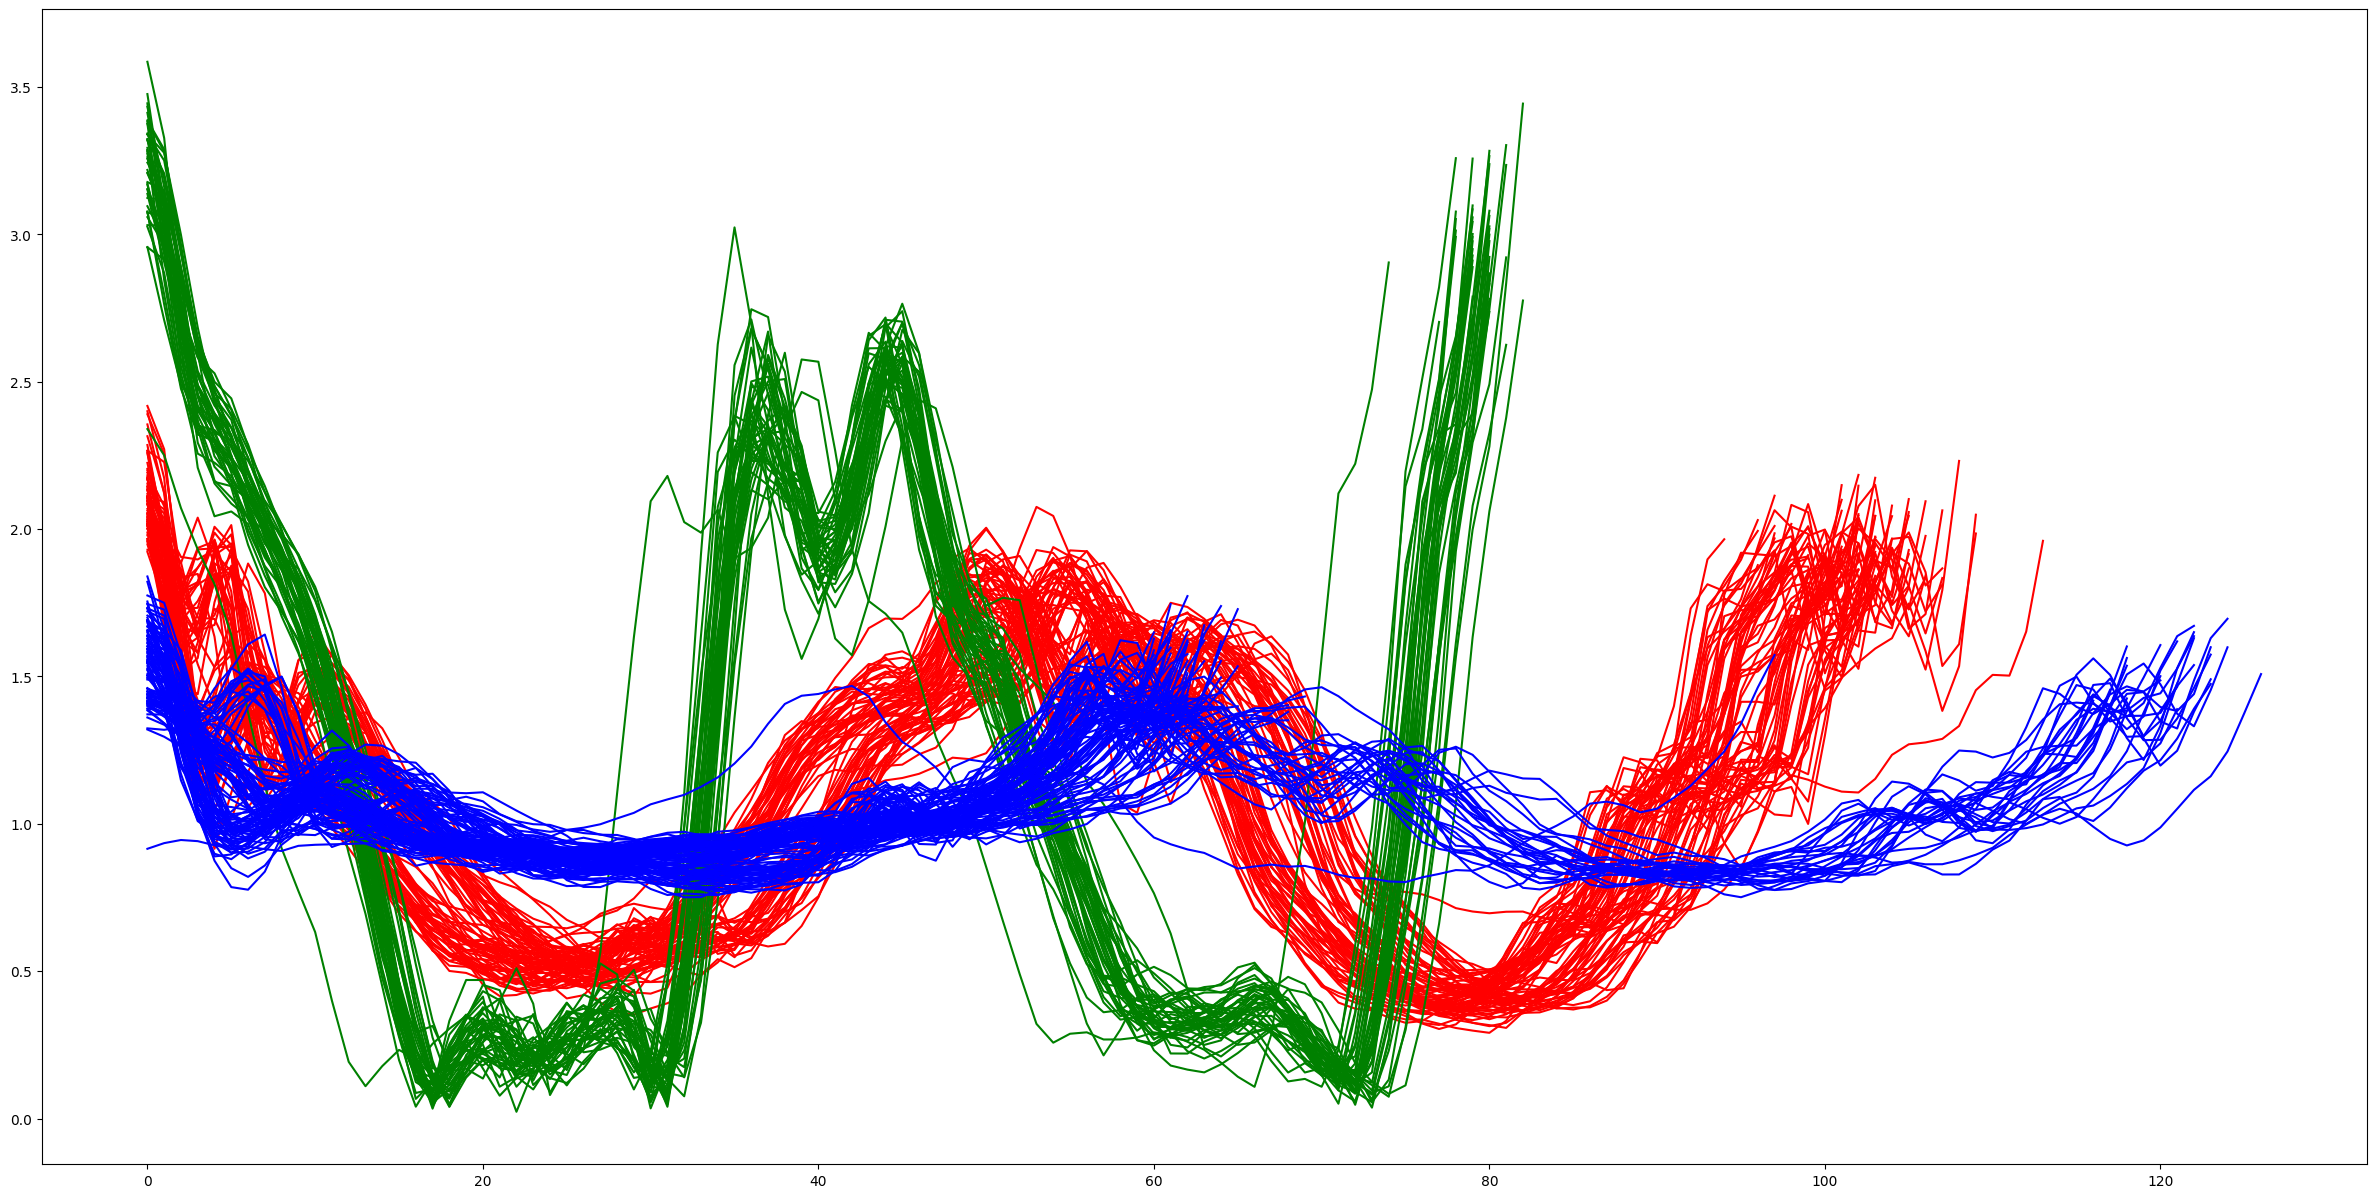

In [15]:
# Access the clusters and centroids attributes

colors = ['red', 'green', 'blue']
for k in range(km.k_clusters):
    cluster = np.array(X, dtype = object)[np.where(np.array(km.clusters) == k)[0]]
    for arr in cluster:
        plt.plot(arr, color = colors[k])

In [16]:
# Soft clustering returns the distance from each instance to each centroid

km.soft_cluster()[:10] # shape: (X.shape[0] x centroids.shape[0])

array([[0.53193133, 0.78113385, 0.68301301],
       [0.7904451 , 0.53868179, 0.77999807],
       [0.6569942 , 0.64415495, 0.5528187 ],
       [0.7604831 , 0.72983968, 0.9722015 ],
       [0.88029136, 0.622661  , 0.69467769],
       [0.70544877, 0.97566982, 0.62216251],
       [0.47996182, 0.56604533, 0.69038379],
       [0.66372374, 0.68052552, 0.73385823],
       [0.8446801 , 0.67606329, 0.89904968],
       [0.79191709, 1.34345432, 0.73835772]])

In [17]:
# Match an incoming time series array to nearest centroid

print('Clustered Labels:', [km.clusters[0], km.clusters[80]])
print('Predicted Labels:', km.predict([X[0], X[80]]))

Clustered Labels: [0, 1]
Predicted Labels: [0, 1]
